<a href="https://colab.research.google.com/github/JeromeEngena/data-analysis-portfolio-projects/blob/main/FITS_astronomy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install astroquery
!pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.7/909.7 kB 24.0 MB/s eta 0:00:00


In [2]:
# import necessary libraries
import matplotlib.pyplot as plt

In [3]:
# import skyview
from astroquery.skyview import SkyView

In [4]:
print(SkyView.URL)
print(SkyView.list_surveys())

http://skyview.gsfc.nasa.gov/current/cgi/basicform.pl
{'Allbands:GOODS/HDF/CDF': ['GOODS: Chandra ACIS HB',
                            'GOODS: Chandra ACIS FB',
                            'GOODS: Chandra ACIS SB',
                            'GOODS: VLT VIMOS U',
                            'GOODS: VLT VIMOS R',
                            'GOODS: HST ACS B',
                            'GOODS: HST ACS V',
                            'GOODS: HST ACS I',
                            'GOODS: HST ACS Z',
                            'Hawaii HDF U',
                            'Hawaii HDF B',
                            'Hawaii HDF V0201',
                            'Hawaii HDF V0401',
                            'Hawaii HDF R',
                            'Hawaii HDF I',
                            'Hawaii HDF z',
                            'Hawaii HDF HK',
                            'GOODS: HST NICMOS',
                            'GOODS: VLT ISAAC J',
                            'GOO

In [5]:
# get Andromeda data (M31) from SDSSg survey using SkyView
try:
  hdu = SkyView.get_images('M31', 'SDSSi')[0][0]
except HTTPError as e:
  print(f'{e}: URL not found')

# Get into the data

In [6]:
# get the metadata using header
m31_header = hdu.header

In [7]:
# get the image pixels data from hdu
m31_pixels = hdu.data

In [8]:
# check the type of the data
type(m31_pixels)

numpy.ndarray

In [9]:
# check the shape of the array (number of pixels)
m31_pixels.shape

(300, 300)

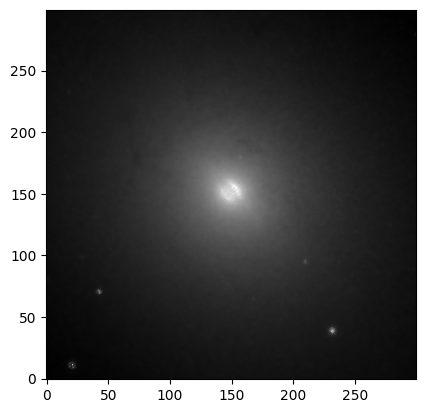

In [10]:
# plot the image
plt.imshow(m31_pixels, cmap='gray', origin='lower')

In [11]:
import astropy.units as u

In [12]:
hdu = SkyView.get_images('M31', 'DSS2 Blue', pixels=600, radius=150*u.arcmin)[0][0]

In [13]:
m31_dss2_blue_pixels = hdu.data

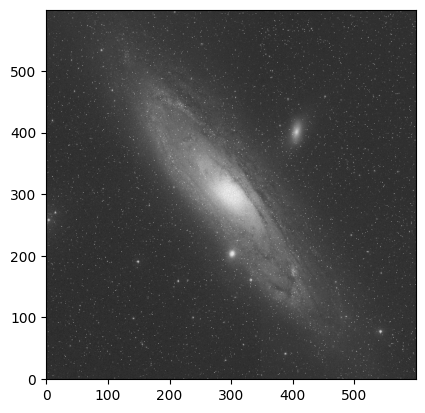

In [14]:
plt.imshow(m31_dss2_blue_pixels, cmap='gray', origin='lower')

# Create custom FITS file

In [15]:
from astropy.io import fits

In [16]:
# create HDU list to store data
hdulist = fits.HDUList()

In [17]:
hdu1 = fits.PrimaryHDU()

In [18]:
# add pixels data
hdu1.data = m31_pixels

In [19]:
# add meta data
hdu1.header = m31_header

In [20]:
# append this primary HDU to the HDU list
hdulist.append(hdu1)

In [21]:
# generate the dummy fits file
hdulist.writeto('dummy_FITS_file.fits', overwrite=True)

# Explore FITS file created

In [22]:
# open the fits file
my_fits = fits.open('/content/dummy_FITS_file.fits')

In [23]:
# check the info
my_fits

In [24]:
# check the first index of fits file
my_fits[0]

In [25]:
# check the header info
my_fits[0].header

SIMPLE  =                    T / Written by SkyView Tue Feb 06 16:19:40 EST 2024
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =              10.6847 / Reference longitude                            
CRVAL2  =              41.2688 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150

In [26]:
# check the pixels using data
my_fits[0].data

array([[18.71875, 18.75   , 18.875  , ..., 26.0625 , 25.59375, 25.84375],
       [18.90625, 18.71875, 19.15625, ..., 25.875  , 25.375  , 25.75   ],
       [19.09375, 19.03125, 19.25   , ..., 25.8125 , 25.625  , 25.75   ],
       ...,
       [25.3125 , 25.90625, 25.5    , ..., 19.15625, 19.15625, 19.71875],
       [25.28125, 25.53125, 25.21875, ..., 19.15625, 18.5    , 19.1875 ],
       [25.5    , 24.96875, 25.1875 , ..., 18.75   , 18.71875, 19.0625 ]],
      dtype=float32)

In [27]:
# store it in a variable
dummy_fits_data = my_fits[0].data

In [28]:
# get the shape
dummy_fits_data.shape

(300, 300)

# 0. Pixel Scaling on M31 data

In [29]:
# import libraries for pixel scaling
import numpy as np

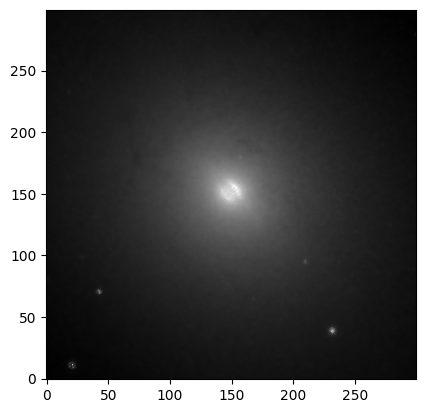

In [30]:
# visualise m31 again
plt.imshow(m31_pixels, cmap='gray', origin='lower')

In [31]:
# check statistics data or the array using numpy
print('Summary statistics of M31 pixels:')

print(f'Minumum: {np.min(m31_pixels)}')
print(f'Maximum: {np.max(m31_pixels)}')
print(f'Average: {np.mean(m31_pixels)}')
print(f'Spread: {np.std(m31_pixels)}')

Summary statistics of M31 pixels:
Minumum: 18.5
Maximum: 219.0
Average: 46.02083206176758
Spread: 20.61849594116211


In [32]:
# value of pixel at the centre of M31
m31_pixels[149,149]

179.25

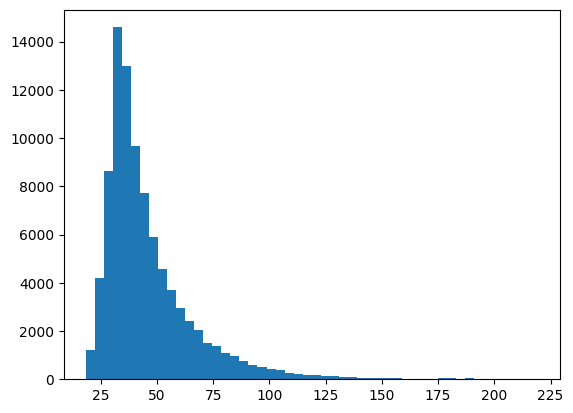

In [33]:
# get the pixel distribution
plt.hist(m31_pixels.flat, bins=50)
plt.show()

# 1. Intensity Normalisation / Pixel Scaling / Min Max Scaling

In [34]:
# Common function to plot the normalised array
def plot_pixels(pixel_array, title, color):
  plt.imshow(pixel_array, cmap='gray', origin='lower')
  plt.title(title, color=color, weight='bold')
  plt.axis('off')
  plt.show()

In [35]:
# Function to normalise the pixel array
def minmax_scaling(pixel_array):
  nom = pixel_array - np.min(pixel_array)
  den = np.max(pixel_array) - np.min(pixel_array)
  return nom/den

In [36]:
# Compare pixels
def compare_pixels(scaled_array, title):
  plt.subplot(1, 2, 1)
  plot_pixels(m31_pixels, title='Original Image', color='black')
  plt.subplot(1, 2, 2)
  plot_pixels(scaled_array, title=title, color='royalblue')
  plt.tight_layout()
  plt.show()

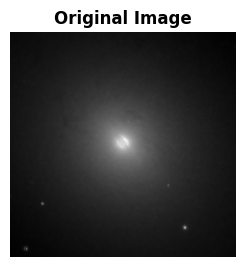

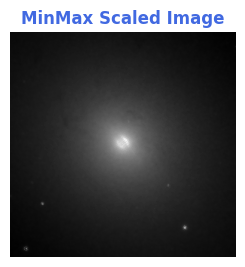

<Figure size 640x480 with 0 Axes>

In [37]:
# Normalise the M31 data and visualise it
minmax_array = minmax_scaling(m31_pixels)
# plot_pixels(minmax_array, title='MinMax Scaling', color='blue')
compare_pixels(minmax_array, title='MinMax Scaled Image')

# 2. Standardisation / Z-Scaling

In [38]:
# Function to standardise
def zscale(pixel_array):
  num = pixel_array - np.mean(pixel_array)
  den = np.std(pixel_array)
  return num/den

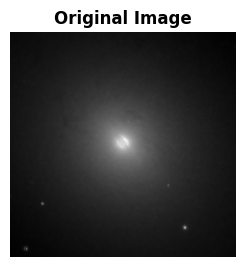

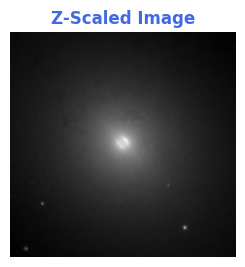

<Figure size 640x480 with 0 Axes>

In [39]:
# Visualise the standardised M31 data
zscaled_array = zscale(m31_pixels)
compare_pixels(zscaled_array, title='Z-Scaled Image')

# 3. Log Normalisation

In [40]:
# Function to normalise
def log_normalise(pixel_array):
  return np.log(pixel_array)

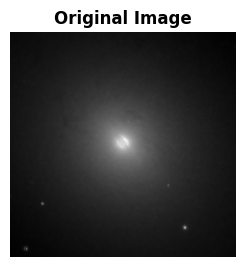

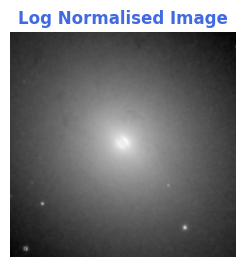

<Figure size 640x480 with 0 Axes>

In [41]:
# Visualise the log normalised data of M31
log_normalised_array = log_normalise(m31_pixels)
compare_pixels(log_normalised_array, title="Log Normalised Image")

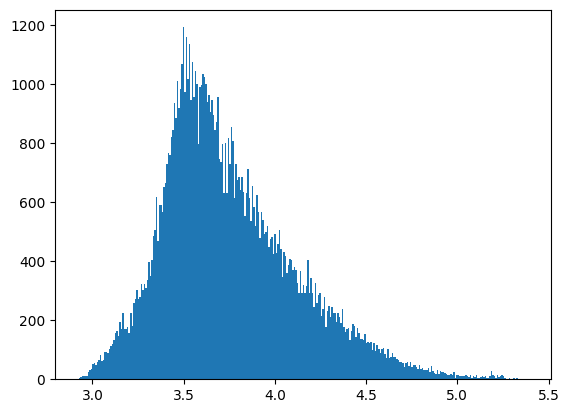

In [42]:
# plot the distribution of the log normalised pixel array
plt.hist(log_normalised_array.flat, bins=300,)
plt.show()

In [43]:
# get the shape of the log normalised data
log_normalised_array.shape

(300, 300)

# 4. Square root scaling

In [44]:
# function for square root scaling
def sqrt_scale(pixel_array):
  return np.sqrt(pixel_array)

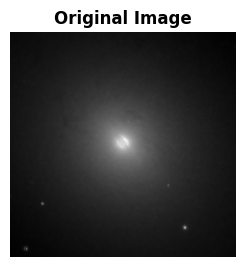

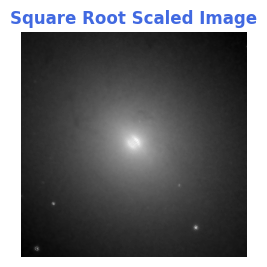

<Figure size 640x480 with 0 Axes>

In [45]:
# compare with the original image
sqrt_scaled_array = sqrt_scale(m31_pixels)
compare_pixels(sqrt_scaled_array, title="Square Root Scaled Image")

# astropy visualisation libraries

## Z-Scale Interval

In [46]:
# import zscaleinterval from astropy
from astropy.visualization import ZScaleInterval

In [47]:
# create the object for zscaleinterval
z = ZScaleInterval()

In [48]:
# Get min and max values of M31 data
z1, z2 = z.get_limits(log_normalised_array)

In [49]:
# display the min and max values
print(f'Minimum: {z1}')
print(f'Maximum: {z2}')

Minimum: 2.92952561378479
Maximum: 5.288267135620117


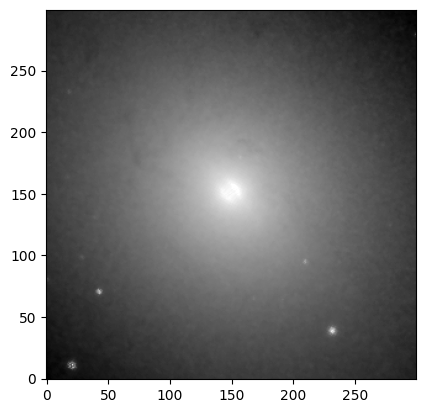

In [50]:
# plot the M31 data using this interval
img = plt.imshow(log_normalised_array, vmin=z1, vmax=z2, cmap='gray', origin='lower')
plt.show()

In [51]:
# get the array created from the above image cell
img_array = img.make_image(renderer=None, unsampled=True)[0]

In [52]:
img_array.shape

(300, 300, 4)

## Change 4 channel image to 1 channel
Note:
* 4 channel: RGB (colour) + Alpha (opacity)
* 1 channel: Grayscale

In [53]:
# import cv2 library
import cv2

In [54]:
# convert 4 channel image to grayscale image
gray_array = cv2.cvtColor(img_array, cv2.COLOR_BGRA2GRAY)

In [55]:
# check the shape of the gray image to confirm the channels have now changed
gray_array.shape

(300, 300)

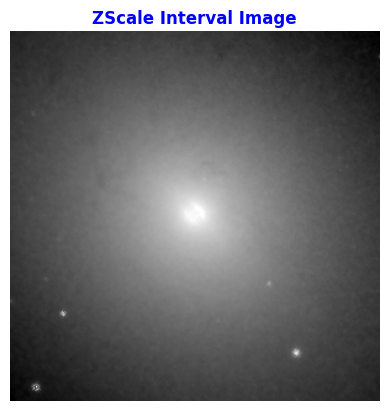

In [56]:
# visualise the image
plot_pixels(gray_array, title='ZScale Interval Image', color='blue')

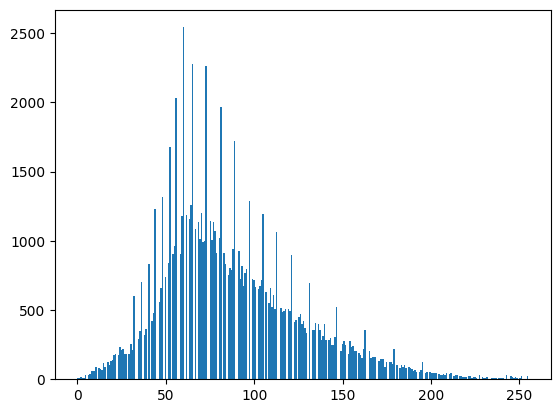

In [57]:
# plot a histogram of grayscale image
plt.hist(gray_array.flat, bins=300,)
plt.show()

In [58]:
# save it in a more meaningful variable name for later use
grayscale_zint_array = gray_array

# Gaussian Denoising

In [59]:
# using convolution 2D filter from scipy's signal module
from scipy.signal import convolve2d

In [60]:
# generate kernel/filter
kernel = np.ones((3,3))/9

In [61]:
# view the kernel
kernel

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [62]:
# create a Gaussian kernel
gaussian_kernel = np.array([[1/16, 1/8, 1/16],
                            [1/8, 1/4, 1/8],
                            [1/16, 1/8, 1/16]])

In [63]:
# create convolution using kernel
convolved_image = convolve2d(m31_pixels, kernel, mode='same')

In [64]:
# convolution using Gaussian kernel
gaussian_convolved_image = convolve2d(m31_pixels, gaussian_kernel, mode='same')

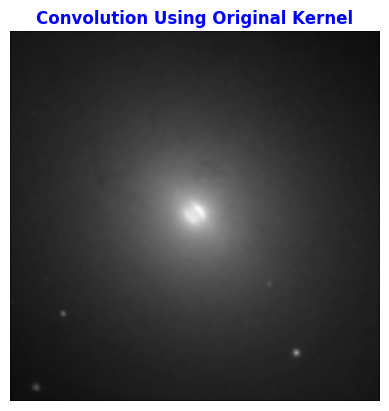

In [65]:
# visualise the convolved_image
plot_pixels(convolved_image, title='Convolution Using Original Kernel', color='blue')

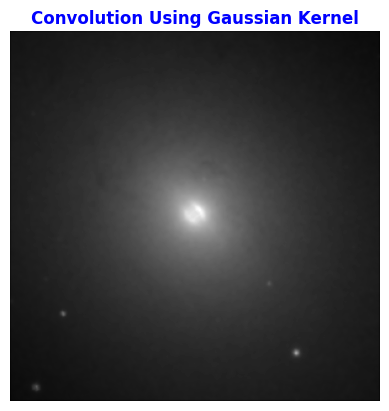

In [66]:
# visualise the gaussian convolution
plot_pixels(gaussian_convolved_image, title='Convolution Using Gaussian Kernel', color='blue')

In [67]:
# using grayscale image of M31 for convolution
grayscale_convolved_image = convolve2d(grayscale_zint_array, gaussian_kernel, mode='same')

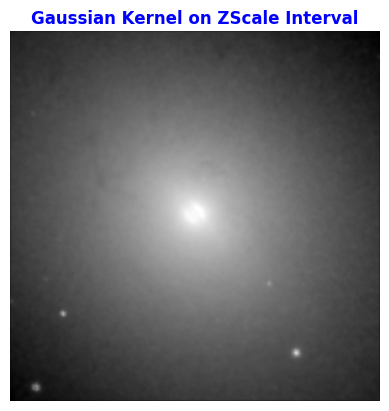

In [68]:
# visualise it
plot_pixels(grayscale_convolved_image, title='Gaussian Kernel on ZScale Interval', color='blue')

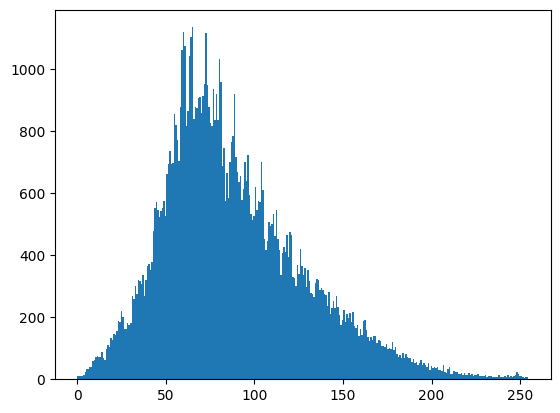

In [69]:
# plot the histogram
plt.hist(grayscale_convolved_image.flat, bins=300)
plt.show()

# Enhancing the linear features on M31

In [70]:
SPECTRAL_LIST = ['gray', 'jet', 'hot', 'prism', 'nipy_spectral']

In [71]:
# import meijering  and sato filters from skimage
from skimage.filters import meijering, sato

In [72]:
# implement filters on the convolved image
meijering_output = meijering(grayscale_convolved_image)
sato_output = sato(grayscale_convolved_image)

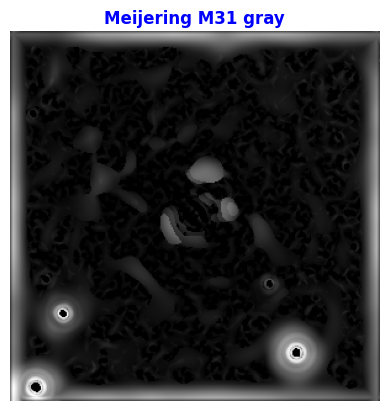

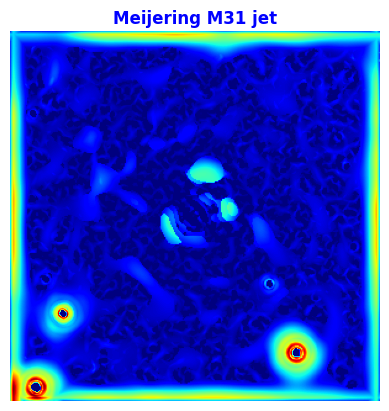

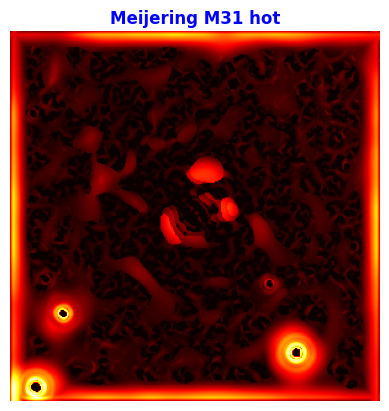

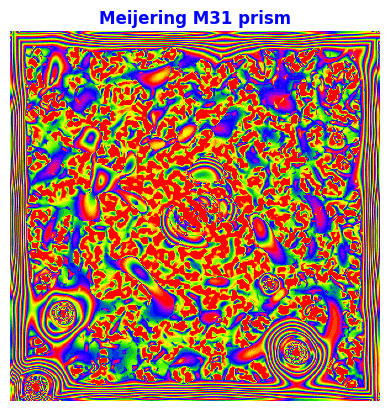

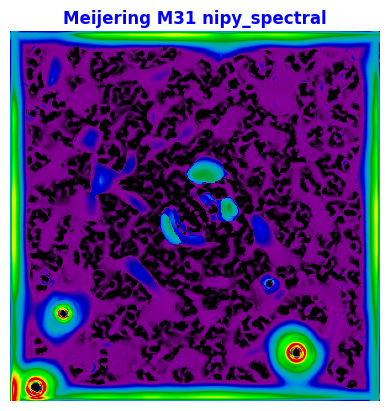

In [73]:
# visualise the meijering output for each element in the spectral list
for colormap in SPECTRAL_LIST:
  plt.imshow(meijering_output, cmap=colormap, origin='lower')
  plt.title(f'Meijering M31 {colormap}', color='blue', weight='bold')
  plt.axis('off')
  plt.show()

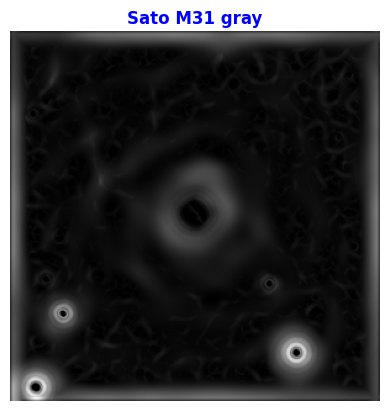

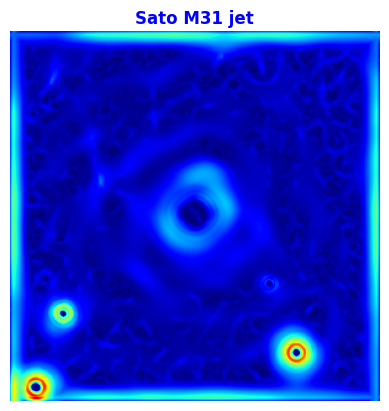

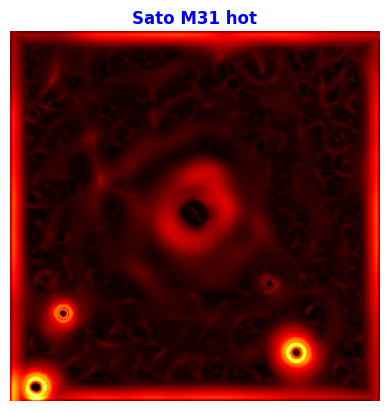

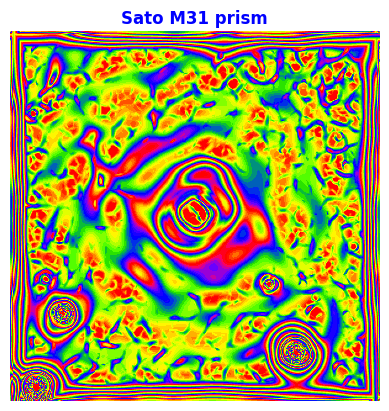

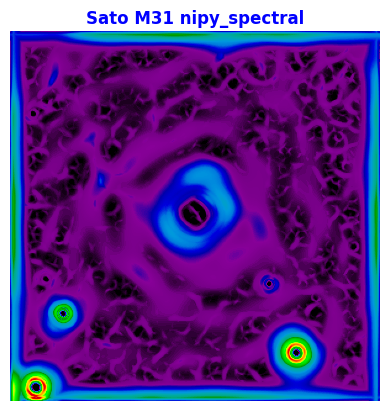

In [74]:
# visualise the sato output for each element in the spectral list
for colormap in SPECTRAL_LIST:
  plt.imshow(sato_output, cmap=colormap, origin='lower')
  plt.title(f'Sato M31 {colormap}', color='blue', weight='bold')
  plt.axis('off')
  plt.show()

# Feature Detection and Extraction

# 1. Corner-Foerstner

In [75]:
# import feature module from skimage
from skimage.feature import corner_foerstner

In [78]:
# implement on any of the scaled pixels
feature_output = corner_foerstner(grayscale_convolved_image)

In [81]:
# check the output of the featured image
feature_output[0]

array([[8.25433005e-01, 2.66541681e+00, 7.52332105e+00, ...,
        4.77498608e+02, 1.27061725e+03, 1.14537881e+03],
       [1.95755991e+00, 5.15151468e+00, 1.20866394e+01, ...,
        7.63202872e+02, 1.64938247e+03, 1.26299943e+03],
       [2.11602410e+00, 4.21606506e+00, 7.59318740e+00, ...,
        5.91615821e+02, 7.58354666e+02, 4.65404067e+02],
       ...,
       [4.32932621e+02, 7.20417079e+02, 5.66734846e+02, ...,
        7.52033908e+00, 9.08697902e+00, 7.43798160e+00],
       [1.16064957e+03, 1.51640194e+03, 6.94886729e+02, ...,
        7.24524936e+00, 7.22265660e+00, 5.74922142e+00],
       [1.04785629e+03, 1.14693610e+03, 4.12744133e+02, ...,
        3.85292798e+00, 3.31590055e+00, 2.33682879e+00]])

In [82]:
# check the type of the featured image
type(feature_output)

tuple

In [83]:
# check the length of the tuple
len(feature_output)

2

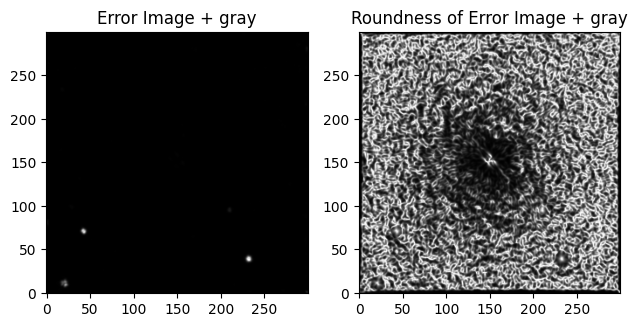

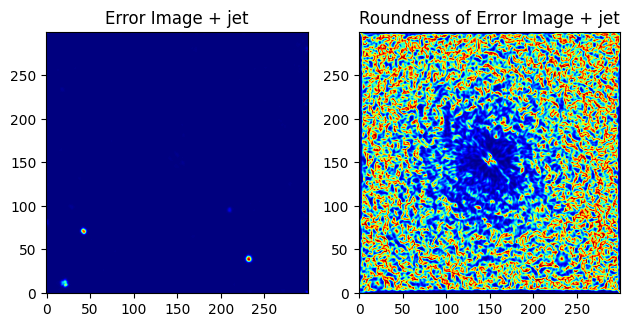

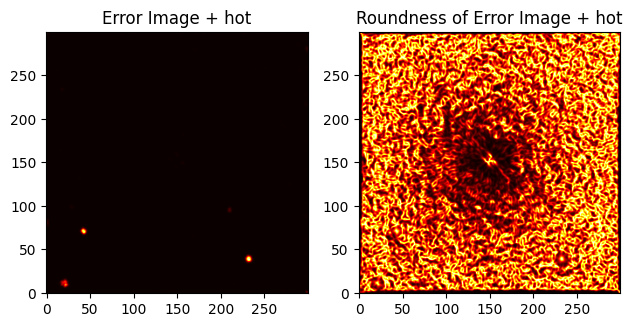

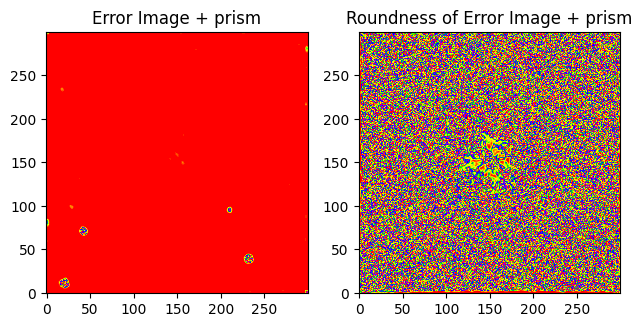

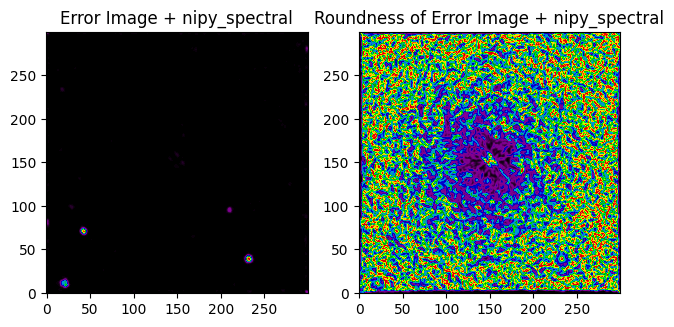

In [86]:
# subplot visualisation
for colormap in SPECTRAL_LIST:
  plt.subplot(1, 2, 1)
  plt.imshow(feature_output[0], cmap=colormap, origin='lower')
  plt.title(f'Error Image + {colormap}')

  plt.subplot(1, 2, 2)
  plt.imshow(feature_output[1], cmap=colormap, origin='lower')
  plt.title(f'Roundness of Error Image + {colormap}')

  plt.tight_layout()
  plt.show()

# 2. Multiscale_basic_features (local features)

In [87]:
# import the feature
from skimage.feature import multiscale_basic_features

In [88]:
# create featured image
featured_image = multiscale_basic_features(grayscale_convolved_image)

In [89]:
# get type
type(featured_image)

numpy.ndarray

In [90]:
# shape
featured_image.shape

(300, 300, 24)

In [93]:
# storing all the channels P1 t0 P24
P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24 = cv2.split(featured_image)

In [98]:
# check P1
P1.shape

(300, 300)

In [97]:
# check P24
P24.shape

(300, 300)

In [99]:
# create list of pixels for each channel
Pixels = [P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24]

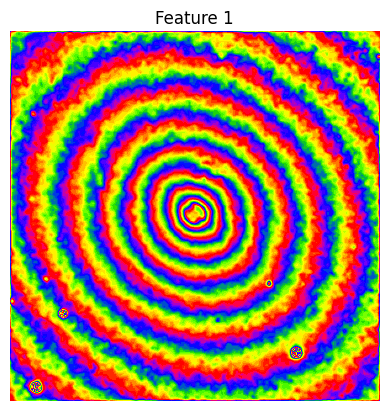

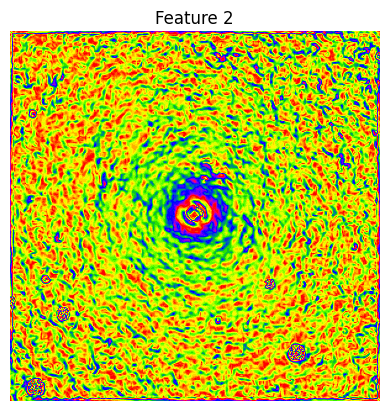

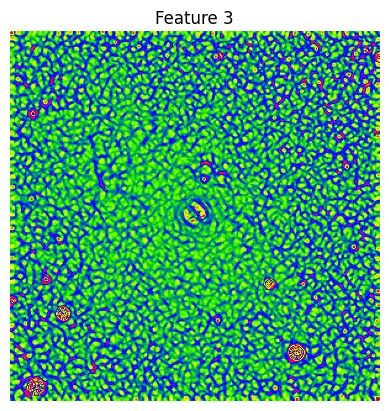

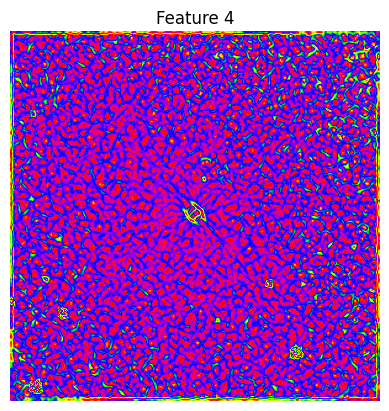

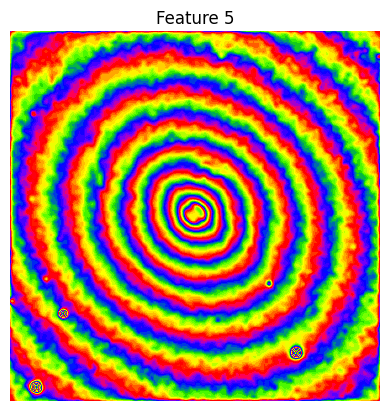

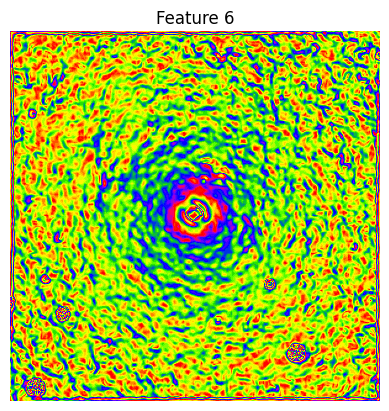

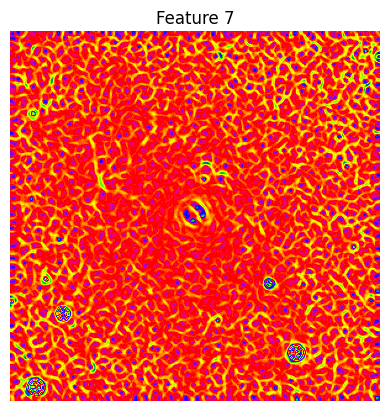

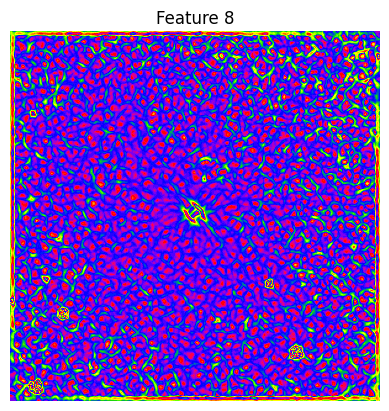

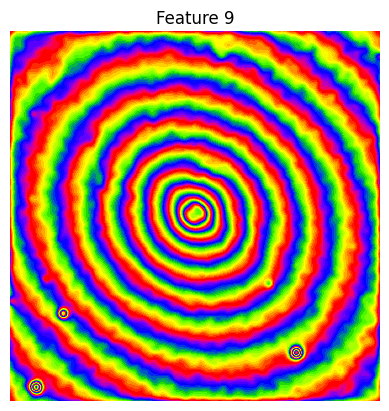

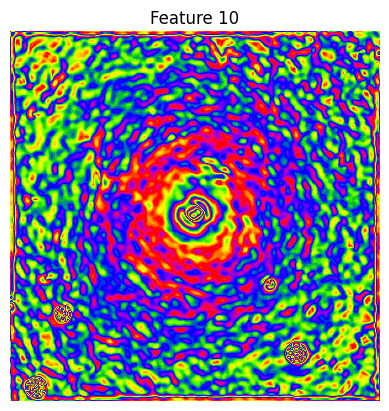

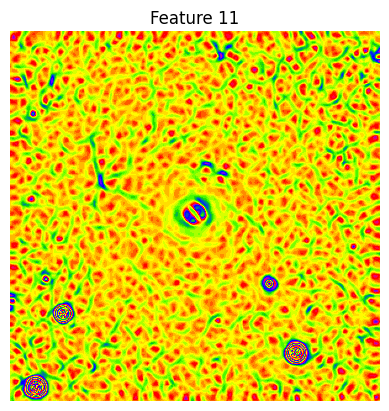

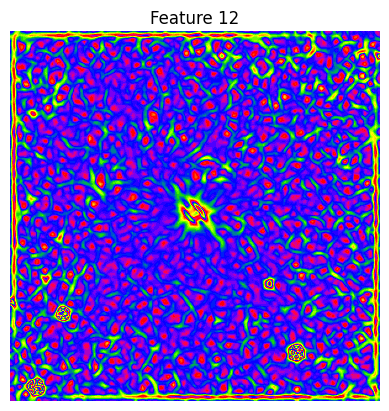

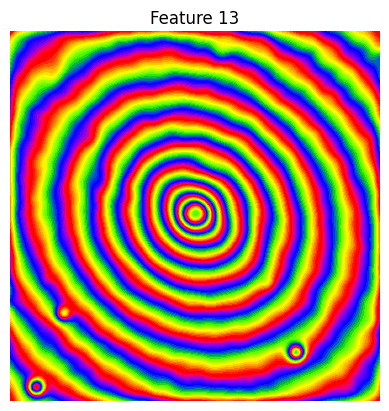

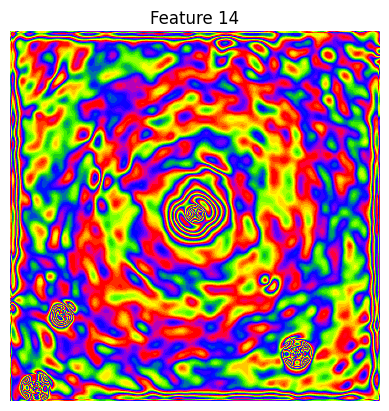

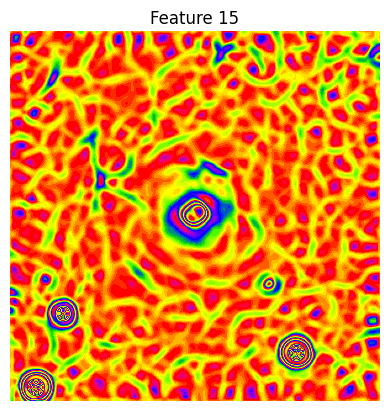

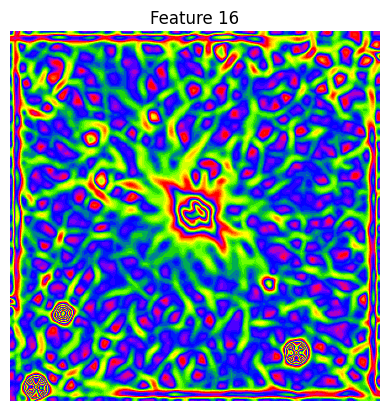

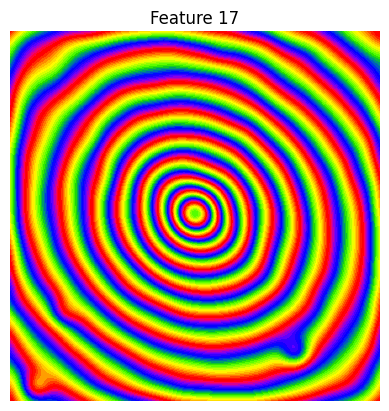

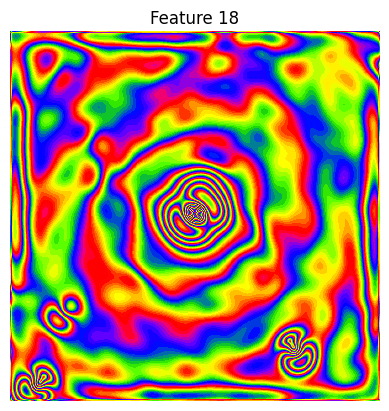

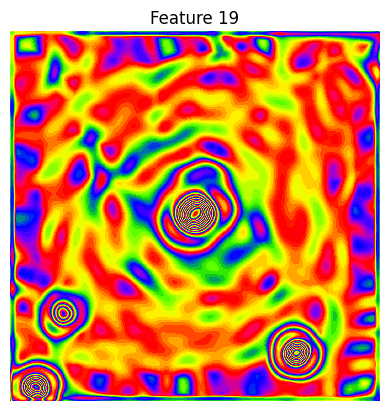

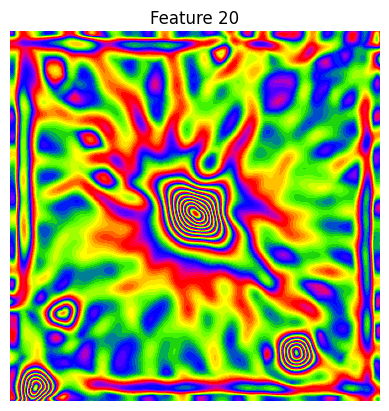

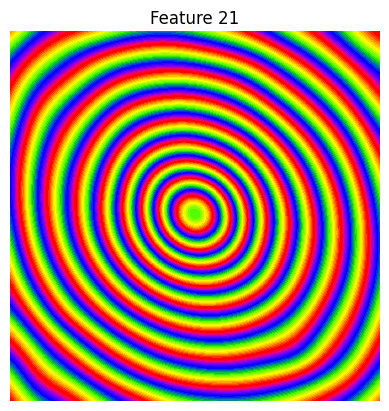

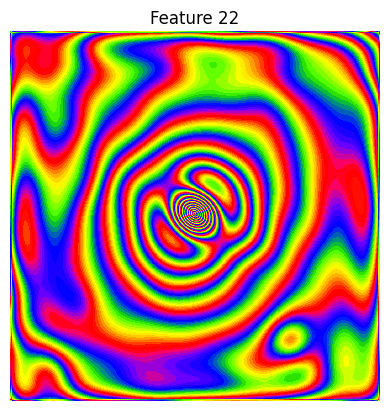

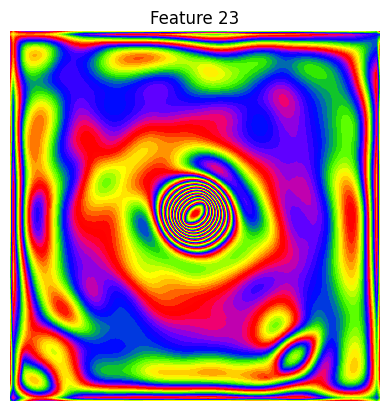

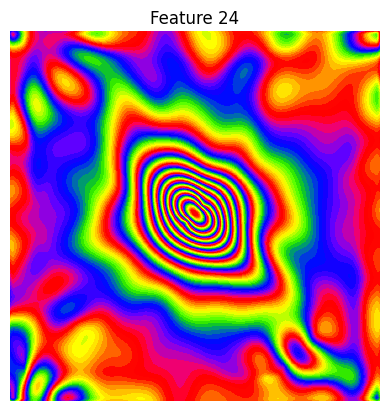

In [100]:
# visualise each channel using prism spectral
for index, feature in enumerate(Pixels):
  plt.imshow(feature, cmap='prism', origin='lower')
  plt.title(f'Feature {index+1}')
  plt.axis('off')
  plt.show()